C:\Users\hp\AppData\Local\Temp\ipykernel_17436\1548126649.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='competitor', palette='Set2')


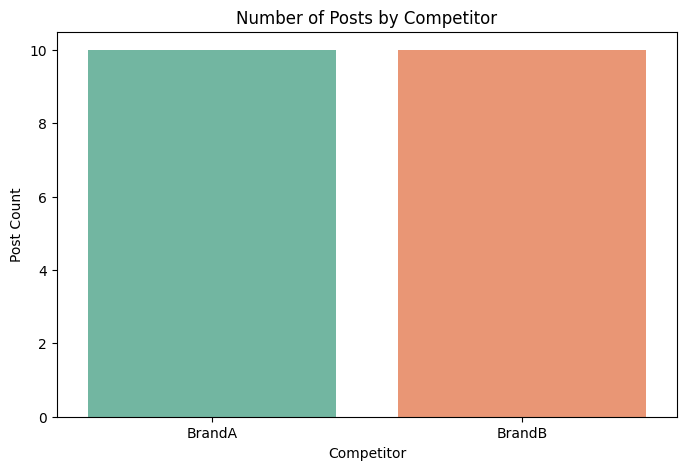

C:\Users\hp\AppData\Local\Temp\ipykernel_17436\1548126649.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_engagement, x='competitor', y='total_engagement', palette='cool')


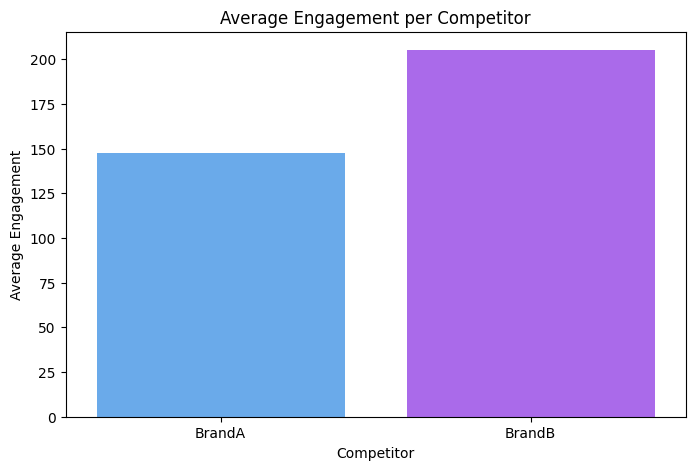

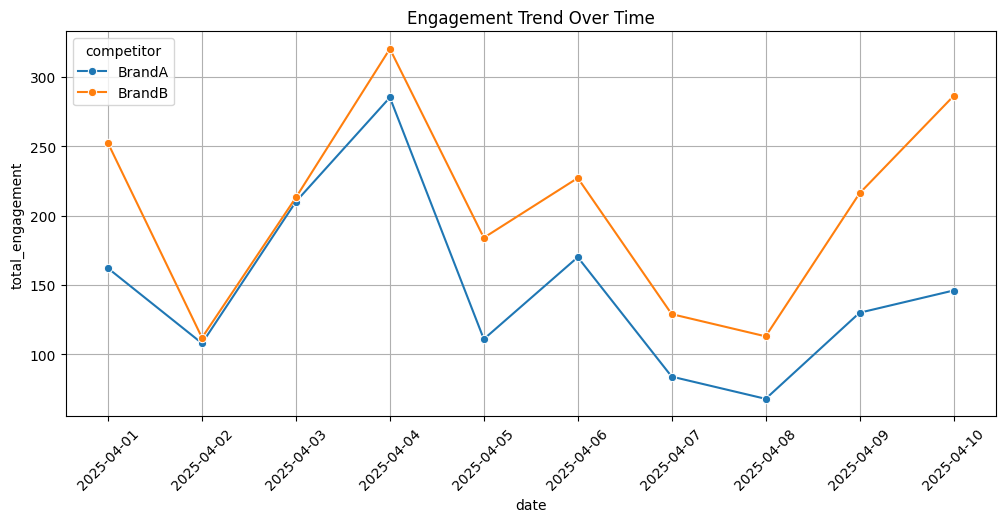

C:\Users\hp\AppData\Local\Temp\ipykernel_17436\1548126649.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_df, x='Count', y='Hashtag', palette='magma')


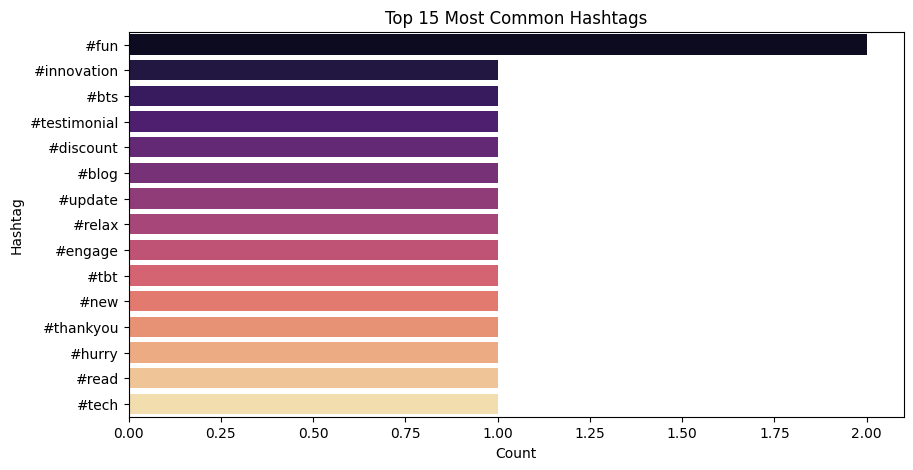

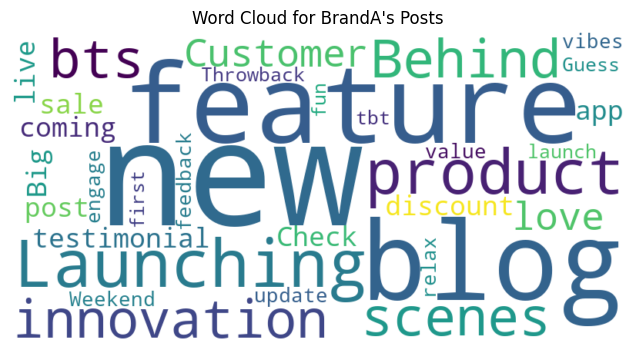

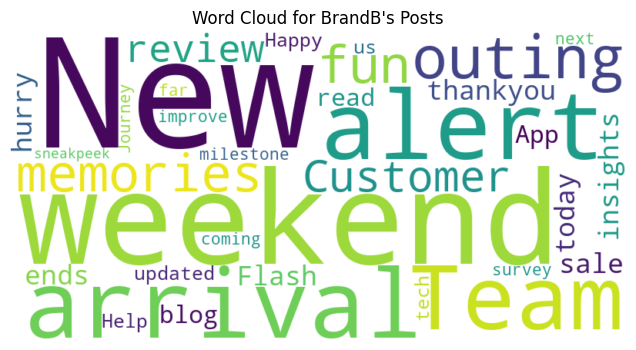

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
df = pd.read_csv('./competitor_social_media_analytics.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Add post_length column
df['post_length'] = df['post_content'].astype(str).apply(len)

# Add date column
df['date'] = df['timestamp'].dt.date

# 1. Number of posts by each competitor
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='competitor', palette='Set2')
plt.title('Number of Posts by Competitor')
plt.xlabel('Competitor')
plt.ylabel('Post Count')
plt.show()

# 2. Average engagement per competitor
df['total_engagement'] = df['likes'] + df['shares'] + df['comments']
avg_engagement = df.groupby('competitor')['total_engagement'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_engagement, x='competitor', y='total_engagement', palette='cool')
plt.title('Average Engagement per Competitor')
plt.ylabel('Average Engagement')
plt.xlabel('Competitor')
plt.show()

# 3. Engagement trend over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='date', y='total_engagement', hue='competitor', marker='o')
plt.title('Engagement Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Hashtag Analysis
df['hashtags'] = df['post_content'].str.findall(r'#\w+')
all_tags = [tag.lower() for tags in df['hashtags'] for tag in tags]
top_tags = Counter(all_tags).most_common(15)
tags_df = pd.DataFrame(top_tags, columns=['Hashtag', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(data=tags_df, x='Count', y='Hashtag', palette='magma')
plt.title('Top 15 Most Common Hashtags')
plt.show()

# 5. Word Cloud for Competitor Posts
for comp in df['competitor'].unique():
    text = ' '.join(df[df['competitor'] == comp]['post_content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {comp}'s Posts")
    plt.show()
